In [1]:
# explor low rank structure of PINN
%load_ext autoreload
%autoreload 2

from Engine import *
from matplotlib import pyplot as plt


In [20]:
exp_name = 'lora'
models = {}
models['p1D1'], _ = load_model(exp_name, 'p1D1')
models['p1D2'], _ = load_model(exp_name, 'p1D2')
models['p2D1'], _ = load_model(exp_name, 'p2D1')
models['prob2'], _ = load_model(exp_name, 'prob2')

Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/485243773024031299/9d44369a99d24e4f8638edbad7f77e21/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/485243773024031299/d9fadccc997d4cfe9ca98f88ff82ddc3/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/485243773024031299/b9cb7103ac844e63884b31e361870f51/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/485243773024031299/26740777af884af0bb23011fbccbe108/artifacts/net.pth


In [21]:
base_name = 'p1D1'
layer_names = ['hidden_layers.0.weight', 'hidden_layers.1.weight']
s = {}
for name in models:
    if name == base_name:
        continue
    s[name] = {}
    for layer_name in layer_names:
        delta = models[name].state_dict()[layer_name] - models[base_name].state_dict()[layer_name]
        _, s[name][layer_name], _ = torch.svd(delta)

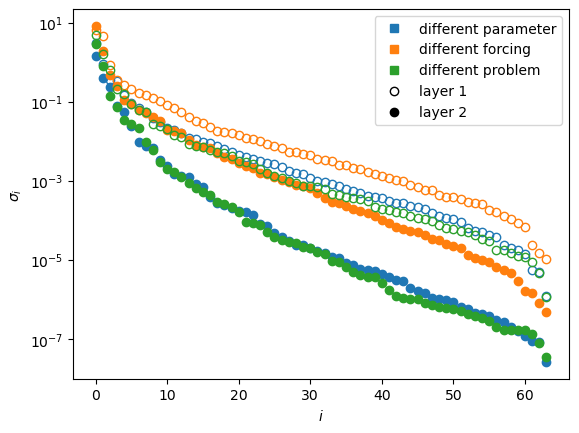

In [25]:
# get default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, name in enumerate(s):
    color = default_colors[i]
    for j, layer_name in enumerate(s[name]):
        fillstyle = 'none' if j == 0 else 'full'        
        plt.plot(s[name][layer_name].cpu().numpy(), 'o', color=color, fillstyle=fillstyle)

# plt.xlim([0, 10])
plt.yscale('log')

plt.plot([],[], 's', color=default_colors[0], label='different parameter')
plt.plot([],[], 's', color=default_colors[1], label='different forcing')
plt.plot([],[], 's', color=default_colors[2], label='different problem')

plt.plot([],[], 'o', color='k', fillstyle='none', label='layer 1')
plt.plot([],[], 'o', color='k', fillstyle='full', label='layer 2')
plt.legend()

plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')

plt.savefig('figs/fig_low_rank.png', bbox_inches='tight')

In [96]:
def get_weights(net):
    weight_dict = {}
    for name, param in net.named_parameters():
        weight_dict[name] = param.clone().detach()
    return weight_dict

# example usage
weight_dict = get_weights(eng.net)